<a href="https://colab.research.google.com/github/gracesway/AdA/blob/master/Waylen_Capstone_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Click here to create a histogram of the data
%%capture
import sys
!{sys.executable} -m pip install numpy 
#!{sys.executable} -m pip install pandas 
#!{sys.executable} -m pip install matplotlib 
#!{sys.executable} -m pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl
import scipy.stats as st
training_data = pd.read_csv("TRAINING DATA.csv")
test_data = pd.read_csv("TEST Data.csv")
MealDataL = [training_data, test_data]
MealData = pd.concat(MealDataL)
# Summary Statistic Counters
count_true = 0
count_false = 0
count = 0
test_actual = 0
test_predict = 0




In [4]:
correlation_matrix = MealData.corr()
correlation_matrix["TotalMeals"]

Case#                0.037760
TotalMeals           1.000000
UniversalMeals       0.101196
TotalEnrolled        0.493281
FR                   0.628131
TraditionalSchool    0.185107
PublicSchool         0.099000
FRP                  0.616693
Unnamed: 9           0.113297
Name: TotalMeals, dtype: float64

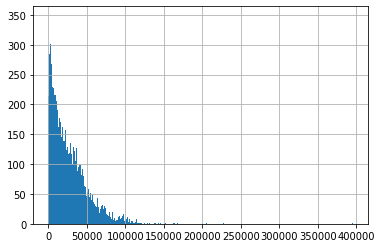

In [6]:
MealData["TotalMeals"].hist(bins =1000)
ptl.show()

In [7]:
sample_size_future = input("Please select a sample size:")

Please select a sample size:50


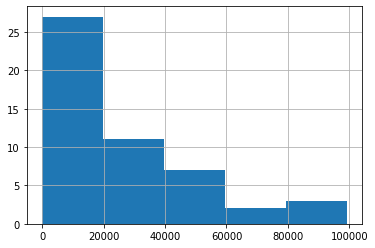

In [9]:
sample_size = int(sample_size_future)
test = test_data.sample(sample_size)
test["TotalMeals"].hist(bins = int(sample_size/10))
ptl.show()

In [10]:
for row in test.itertuples():
    # set the filters for meal and school type
    mealt = row[2]
    stype = row[9]

    # Get the training data
    meals = pd.read_csv("TRAINING DATA.csv")
    # Filter the training dta
    meals = meals[(meals['Meal'] == mealt)]
    meals = meals[(meals['SchoolType'] == stype)]
    # Drop unnecessary fields
    meals = meals.drop('Case#', axis=1)
    meals = meals.drop('Meal', axis=1)
    meals = meals.drop('SchoolType', axis=1)

    # Create points for distance calculation
    X = meals.drop("TotalMeals", axis=1)
    X = X.values
    y = meals["TotalMeals"]
    y = y.values

    # Add the data point to be tested
    new_data_point = np.array([row[4], row[5], row[6], row[7], row[8]])
    distances = np.linalg.norm(X-new_data_point, axis=1)

    # Set K Value and find nearest neighbors
    K = 4
    nn = distances.argsort()[:K]
    nn_totalmeals = y[nn]
    nn_average = nn_totalmeals.mean()

    # Create a 99% CI
    interval = st.t.interval(alpha=0.99, df=(K-1), loc=np.mean(nn_totalmeals), scale=st.sem(nn_totalmeals))

    # See if the actual number of meals from test fits into the 99% CI
    if float(interval[0]) <= float(row[3]) <= float(interval[1]):
        count_true += 1
    count += 1
    print(count)
    test_actual += float(row[3])
    test_predict += nn_average

# Print summary Statistics
print("Accurate CI:" + str(count_true))
print("% Accurate: " + str(round((count_true/count)*100,2)) + "%")
print("Actual: " + str(test_actual))
print("predicted: " + str(test_predict))
difference = abs(test_actual - test_predict)
print(round((test_actual-difference)/test_actual*100,2))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Accurate CI:47
% Accurate: 94.0%
Actual: 1287467.0
predicted: 1200604.5
93.25
